## Worst Plane Crashes in History

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 
matplotlib.style.use('ggplot')

In [59]:
df = pd.read_csv('plane_crash_info.csv')
df.head(5)

,Unnamed: 0,Fatal,Date,Location,Carrier,Flight,Type
0,1,2907*,09/11/2001,"New York City, New York",American /United Airlines,11/93,B767 / B767
1,2,583,03/27/1977,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747
2,3,520,08/12/1985,"Mt. Osutaka, Japan",Japan Air Lines,123,B747
3,4,349,11/12/1996,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76
4,5,346,03/03/1974,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10


In [60]:
df = df.drop(df.columns[0], axis=1)
df.head()

,Fatal,Date,Location,Carrier,Flight,Type
0,2907*,09/11/2001,"New York City, New York",American /United Airlines,11/93,B767 / B767
1,583,03/27/1977,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747
2,520,08/12/1985,"Mt. Osutaka, Japan",Japan Air Lines,123,B747
3,349,11/12/1996,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76
4,346,03/03/1974,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fatal     104 non-null    object
 1   Date      104 non-null    object
 2   Location  104 non-null    object
 3   Carrier   104 non-null    object
 4   Flight    104 non-null    object
 5   Type      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [62]:
df.describe().T

,count,unique,top,freq
Fatal,104,73,154,4
Date,104,102,09/11/2001,2
Location,104,97,"Tenerife, Canary Islands",3
Carrier,104,93,Aeroflot,4
Flight,104,90,-,10
Type,104,45,B727,11


In [63]:
columns = df.columns
for column in columns:
    print(f"{column} : {df[column].nunique()}")

Fatal : 73
Date : 102
Location : 97
Carrier : 93
Flight : 90
Type : 45


### Replacing the Value '2907*' to a numeric value '2907' so all our values in the column 'Fatal' would be consistent and wont be a problem in visualizations

In [64]:
df['Fatal'] = df['Fatal'].replace('2907*', 2907)
df.head()

,Fatal,Date,Location,Carrier,Flight,Type
0,2907,09/11/2001,"New York City, New York",American /United Airlines,11/93,B767 / B767
1,583,03/27/1977,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747
2,520,08/12/1985,"Mt. Osutaka, Japan",Japan Air Lines,123,B747
3,349,11/12/1996,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76
4,346,03/03/1974,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10


In [65]:
df['Fatal'] = df['Fatal'].astype(int)

### Yielding 'Year' from each date from the 'Date' Column and making it a separate column

In [66]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.head()

,Fatal,Date,Location,Carrier,Flight,Type,Year
0,2907,2001-09-11,"New York City, New York",American /United Airlines,11/93,B767 / B767,2001
1,583,1977-03-27,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747,1977
2,520,1985-08-12,"Mt. Osutaka, Japan",Japan Air Lines,123,B747,1985
3,349,1996-11-12,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76,1996
4,346,1974-03-03,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10,1974


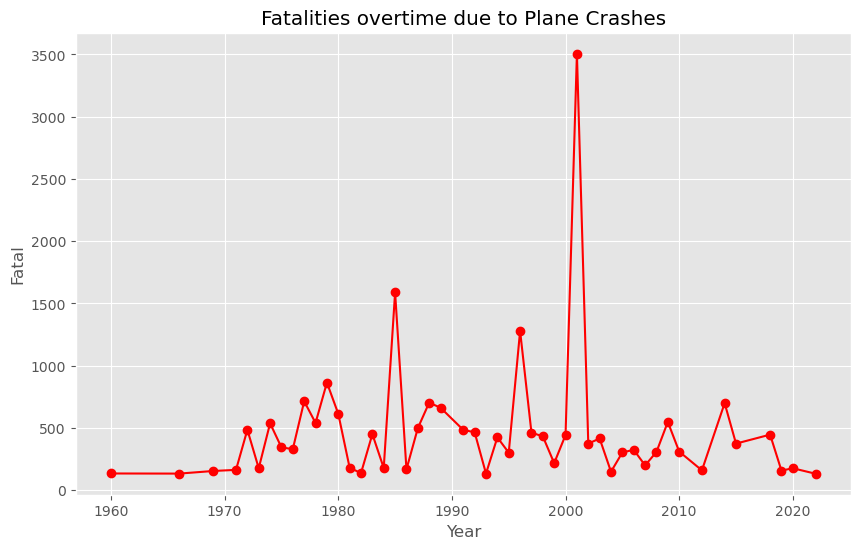

In [67]:
yearly_totals = df.groupby('Year')['Fatal'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Fatal'], marker='o', linestyle='-', color='r')
plt.title('Fatalities overtime due to Plane Crashes')
plt.xlabel('Year')
plt.ylabel('Fatal')
plt.show()

In [71]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month

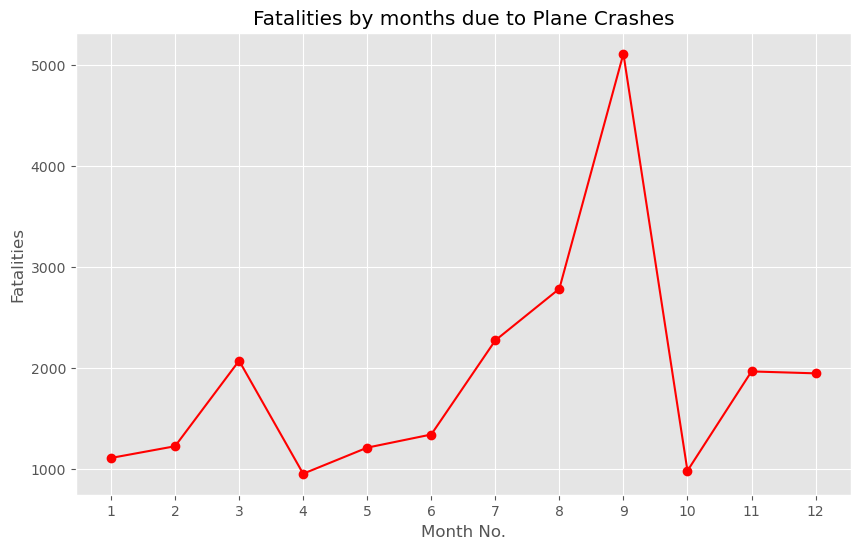

In [72]:
monthly_totals = df.groupby('Month')['Fatal'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_totals['Month'], monthly_totals['Fatal'], marker='o', linestyle='-', color='r')
plt.title('Fatalities by months due to Plane Crashes')
plt.xlabel('Month No.')
plt.ylabel('Fatalities')
plt.xticks(monthly_totals['Month'])
plt.show()

In [73]:
df['Country/State'] = df['Location'].str.split(', ').str[-1]
df.head()

,Fatal,Date,Location,Carrier,Flight,Type,Year,Month,Country/State
0,2907,2001-09-11,"New York City, New York",American /United Airlines,11/93,B767 / B767,2001,9,New York
1,583,1977-03-27,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747,1977,3,Canary Islands
2,520,1985-08-12,"Mt. Osutaka, Japan",Japan Air Lines,123,B747,1985,8,Japan
3,349,1996-11-12,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76,1996,11,India
4,346,1974-03-03,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10,1974,3,France


In [74]:
ax = df.groupby('Country/State')['Fatal'].sum().reset_index()
ax.head()

,Country/State,Fatal
0,Behrain,143
1,Massachusetts,217
2,Virginia,189
3,Brazil,137
4,Texas,135


In [75]:
top_5 = ax.sort_values(by='Fatal', ascending=False).head(5)
top_5

,Country/State,Fatal
43,New York,2907
35,Japan,1080
16,Canary Islands,884
33,Iran,752
30,India,720


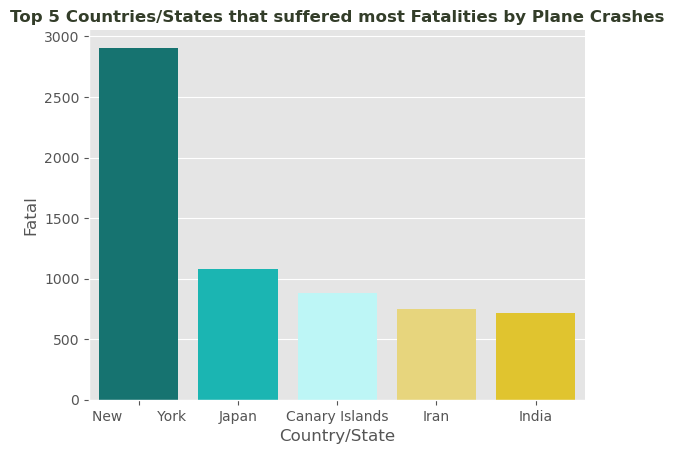

In [76]:
ax = sns.barplot(data=top_5, x='Country/State', y='Fatal', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Countries/States that suffered most Fatalities by Plane Crashes', fontsize=12, weight=600, color='#333d29')
sns.despine()
plt.show()

### The marker around 2001 is the clear indication of the world's most infamous planes crashes on Twin Towers on September 2001 which caused thousands of fatalities

In [77]:
ax = df.groupby('Type')['Fatal'].sum().reset_index()
ax.head()

,Type,Fatal
0,A300,1423
1,A310,152
2,A310-304,169
3,A320,654
4,A321,376


In [78]:
top_5 = ax.sort_values(by='Fatal', ascending=False).head(5)
top_5

,Type,Fatal
19,B767 / B767,2907
14,B747,2624
10,B727,1599
0,A300,1423
13,B737,1375


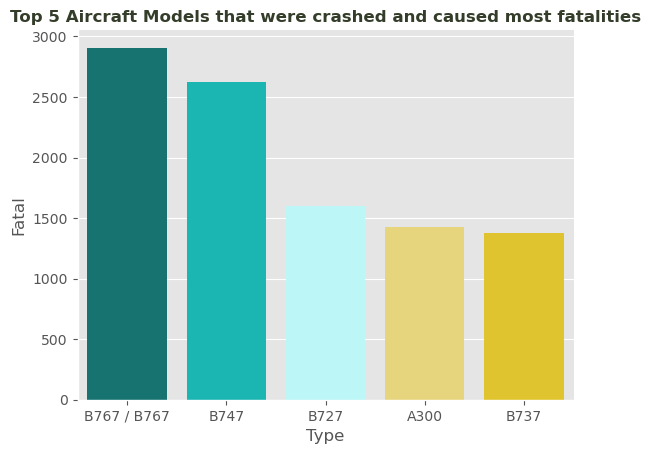

In [79]:
ax = sns.barplot(data=top_5, x='Type', y='Fatal', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Aircraft Models that were crashed and caused most fatalities', fontsize=12, weight=600, color='#333d29')
sns.despine()
plt.show()

### Again the B767 / B767 were the both aircrafts that hit Twin Towers, so to no surprise they caused the most fatalities, but right next to them is Boeing 747 which is to be noticed

In [80]:
df.head()

,Fatal,Date,Location,Carrier,Flight,Type,Year,Month,Country/State
0,2907,2001-09-11,"New York City, New York",American /United Airlines,11/93,B767 / B767,2001,9,New York
1,583,1977-03-27,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747,1977,3,Canary Islands
2,520,1985-08-12,"Mt. Osutaka, Japan",Japan Air Lines,123,B747,1985,8,Japan
3,349,1996-11-12,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76,1996,11,India
4,346,1974-03-03,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10,1974,3,France


In [81]:
ax = df.groupby('Carrier')['Fatal'].sum().reset_index()
ax.head()

,Carrier,Fatal
0,Aeroflot,718
1,Aeroflot / Aeroflot,178
2,African Air,227
3,Aila Royal Jordanian Airlines,188
4,Aila Royal Jordanian Airlines,176


In [82]:
top_5 = ax.sort_values(by='Fatal', ascending=False).head(5)
top_5

,Carrier,Fatal
15,American /United Airlines,2907
0,Aeroflot,718
17,American Airlines,698
64,Pan Am / KLM,583
6,Air India,542


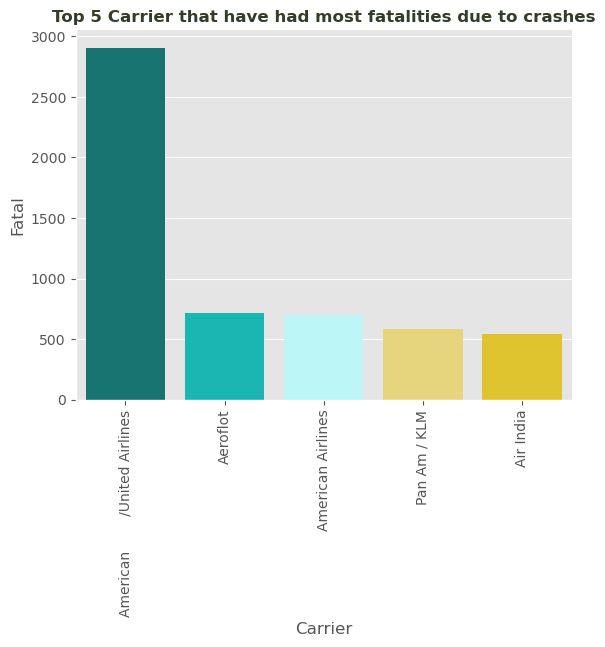

In [83]:
ax = sns.barplot(data=top_5, x='Carrier', y='Fatal', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Carrier that have had most fatalities due to crashes', fontsize=12, weight=600, color='#333d29')
sns.despine()
plt.xticks(rotation=90)
plt.show()